<a href="https://colab.research.google.com/github/heysourin/Machine-Learning-Projects/blob/main/From%20Scratch/Linear_regression_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear Regression From Scratch: On Housing dataset**


In [ ]:
import numpy as np

class LinearRegression:
  def __init__(self, learning_rate=0.01, epochs=10000):
    self.weights = None
    self.bias = None
    self.learning_rate = learning_rate
    self.epochs = epochs

  def fit(self, X, y):
    n_samples, n_features = X.shape
    self.weights = np.zeros(n_features)
    self.bias = 0

    X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)# Feature scaling

    for _ in range(self.epochs):
      dj_dw = np.zeros(n_features)
      dj_db = 0

      for i in range(n_samples):
        y_pred_i = np.dot(self.weights, X[i]) + self.bias
        dj_dw_i = (y_pred_i - y[i]) * X[i]
        dj_db_i = (y_pred_i - y[i])

        dj_dw += dj_dw_i
        dj_db += dj_db_i

      dj_dw /= n_samples
      dj_db /= n_samples

      self.weights -= self.learning_rate * dj_dw
      self.bias -= self.learning_rate * dj_db

  def predict(self, X):
    X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)# Feature scaling
    y_pred = np.dot(X, self.weights) + self.bias
    return y_pred

## **Mathematical intuition:**
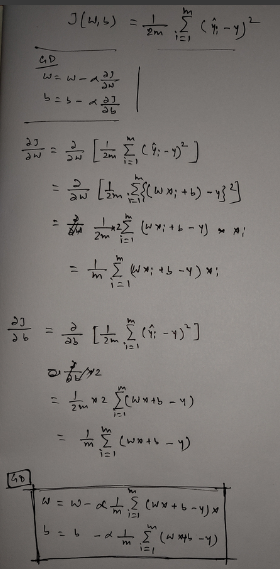

In [ ]:
df = pd.read_csv('/content/sample_data/california_housing_train.csv')

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
X = df.drop('median_house_value', axis=1).values
y = df['median_house_value'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train = X_train.reshape(-1, 8)
X_test = X_test.reshape(-1, 8)

In [ ]:
model = LinearRegression(learning_rate=0.01, epochs=4000)

In [ ]:
model.fit(X_train, y_train)

In [ ]:
prediction = model.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, prediction)
print("R-squared:", r2)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, prediction)
print("Mean squared error:", mse)

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, prediction)
print("Mean absolute error:", mae)

R-squared: 0.6639689866813989
Mean squared error: 4630120319.740081
Mean absolute error: 49767.19789922628
